#A Variational Autoencoder (VAE) is a deep learning model that can generate new data samples. It comprises two parts: an encoder network and a decoder network. The encoder network maps the input data to a lower-dimensional latent space, and the decoder network maps the latent representation back to the original data space.

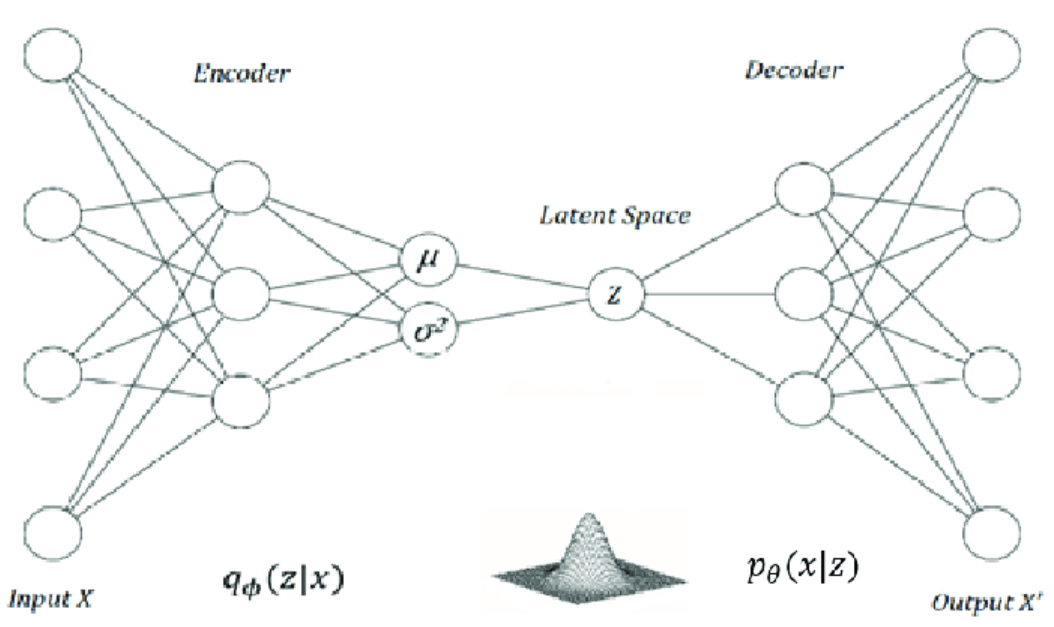

VAEs are generative models that learn a dataset's underlying probability distribution and generate new samples.

They use an encoder-decoder architecture, where the encoder maps the input data to a latent representation, and the decoder tries to reconstruct the original data from this latent representation.

The VAE is trained to minimize the difference between the original data and the reconstructed data, allowing it to learn the underlying distribution of the data and generate new samples that follow that same distribution.



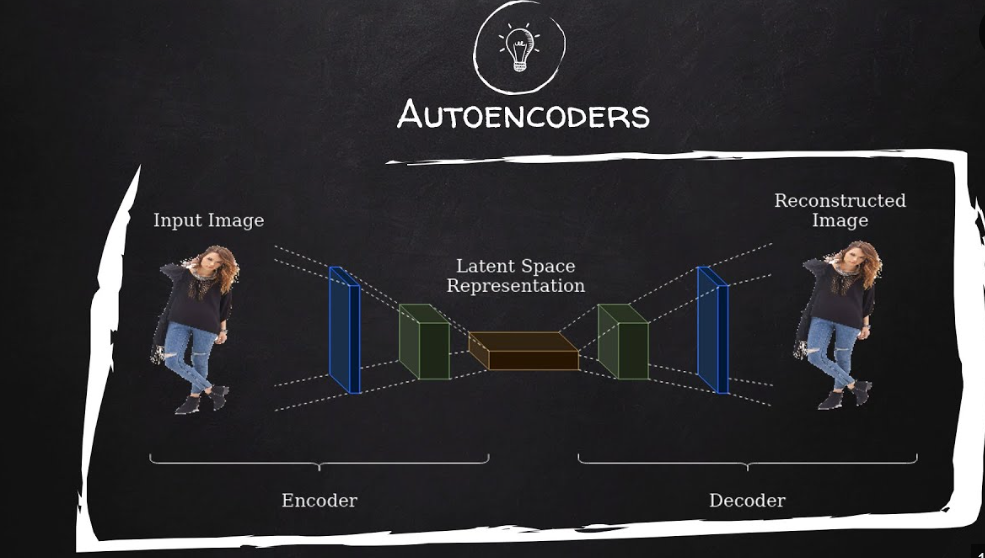

#The architecture of a Variational Autoencoder (VAE) consists of three main components: the encoder, the latent space, and the decoder. Here's an overview of each component and how they work together:



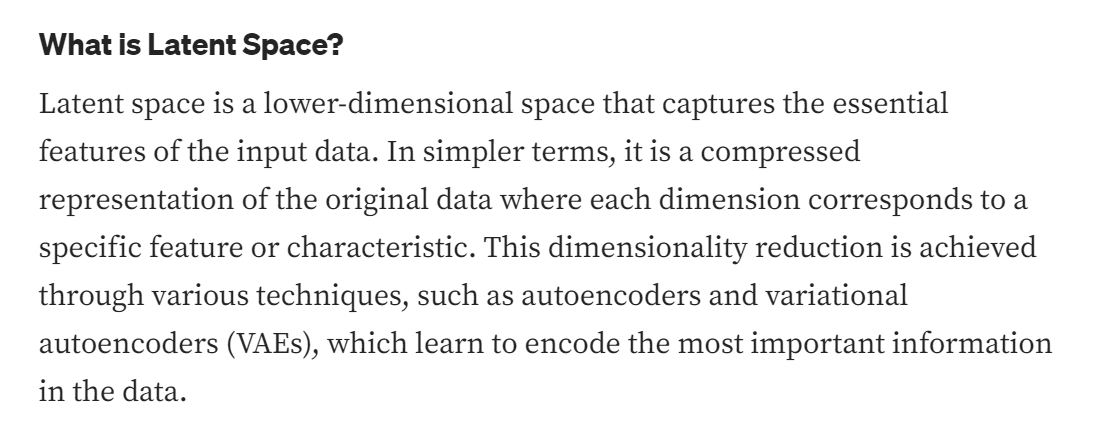

**Applications of Latent Space:**

* Image Generation

It is extensively used in image generation tasks. By mapping high-dimensional data (e.g., images) into a lower-dimensional latent space, models can generate new, realistic images by sampling points in the latent space.

* Data Compression

Latent space serves as an effective means of data compression. Through techniques like Principal Component Analysis (PCA), relevant information is retained while discarding redundant details, facilitating more efficient storage and processing.


* Language Processing

In NLP latent space is employed to represent words or sentences in a meaningful way.

**Autoencoders Overview:**

Autoencoders are neural network architectures commonly used for dimensionality reduction and latent space representation. They consist of an encoder and a decoder, with the encoder learning to compress the input data into the latent space, and the decoder reconstructing the original data from this representation.

**Autoencoder: This is a self-trained process to compress and decompress the data. It is used to compress the data and denoise the data.**

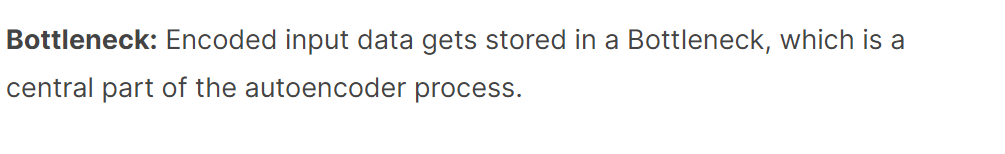

#Architecture of Variational Autoencoder

VAE typically consists of an encoder network and a decoder network.

* The encoder network maps the input data to a lower-dimensional latent space, often called the "latent code."


* The decoder network takes the latent code as input and tries to reconstruct the original data.

* The encoder network can be any neural network, such as a fully connected or convolutional neural network.

* The output of the encoder network is the mean and variance of a Gaussian distribution, which is used to sample the latent code.

* The decoder network can also be any neural network trained to reconstruct the original data from the latent code.

* In this architecture, the encoder network maps the input data to the latent code, and the decoder network maps the latent code back to the reconstructed data.

* The VAE is then trained to minimize the reconstruction error between the input and reconstructed data.


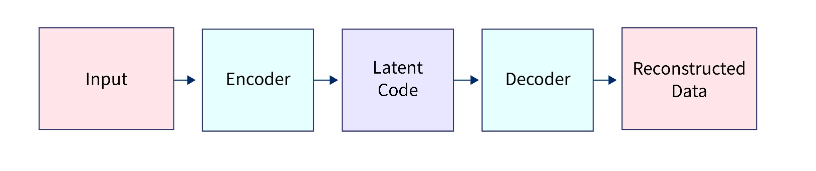

#Reconstruction error
The difference between the original input and the reconstruction output in the autoencoder

or

 mean-squared error or cross-entropy between the output and the input, known as the reconstruction loss

#kullback-leibler divergence

To measure the difference between two probability distributions over the same variable

#Example
Imagine you have a bunch of images of cats and dogs.

You want your VAE to learn a latent space where similar images are close to each other.

* Input Image: You input an image of a cat into the VAE.
*Encoder: The encoder compresses this image into a latent space with a mean and variance.

* KL Divergence: The KL divergence part of the loss function ensures that this latent space representation is close to a standard normal distribution.

* Decoder: The decoder reconstructs the image from this latent representation.
* Loss Calculation:
* Reconstruction Loss: Measures the difference between the original image and the reconstructed image.

* KL Divergence Loss: Ensures the latent space representation follows a standard normal distribution.

* By combining these two losses, the VAE learns to produce smooth and continuous latent spaces that can generate realistic new data (e.g., new images of cats and dogs) by sampling from this latent space.


**Summary**
KL divergence in VAEs ensures that the learned latent space is smooth and follows a standard normal distribution, which helps in generating new, realistic data points. It balances the reconstruction accuracy and the regularization of the latent space, making the VAE a powerful tool for generating and understanding complex data.









#Application
* Music Generation
* Speech Recognition
* Voice Transformation
* Drug Molecule Design
* Genetic Data Analysis
* Protein Structure Prediction

#Here's a simplified example code snippet in Python using the Keras library to build a basic VAE for generating images:



In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
# Load your image
image_path = '/content/channels4_profile.jpg'  # Change this to the path of your image
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to 28x28

# Normalize the image data to [0, 1] range
image = np.array(image).astype('float32') / 255.0

# Reshape the data to (1, 28, 28, 1)
image = np.reshape(image, (1, 28, 28, 1))

In [4]:
latent_dim = 2

inputs = Input(shape=(28, 28, 1), name='encoder_input')
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 flatten (Flatten)           (None, 784)                  0         ['encoder_input[0][0]']       
                                                                                                  
 dense (Dense)               (None, 256)                  200960    ['flatten[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 128)                  32896     ['dense[0][0]']               
                                                                                            

In [5]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(128, activation='relu')(latent_inputs)
x = Dense(256, activation='relu')(x)
x = Dense(28 * 28, activation='sigmoid')(x)
outputs = Reshape((28, 28, 1))(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 234896 (917.56 KB)
Trainable params: 234896 (917.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')
vae.summary()


Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        [(None, 2),               234372    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         234896    
                                                                 
Total params: 469268 (1.79 MB)
Trainable params: 469268 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
reconstruction_loss = binary_crossentropy(tf.keras.backend.flatten(inputs), tf.keras.backend.flatten(outputs))
reconstruction_loss *= 28 * 28

kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5

vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')


In [9]:
vae.fit(image, image, epochs=10, batch_size=1)


Epoch 1/10
1/1 [==============================] - 0s 18ms/step - loss: 319.9370
Epoch 2/10
1/1 [==============================] - 0s 15ms/step - loss: 319.7595
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 320.5539
Epoch 4/10
1/1 [==============================] - 0s 19ms/step - loss: 321.4146
Epoch 5/10
1/1 [==============================] - 0s 14ms/step - loss: 327.2586
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 324.9606
Epoch 7/10
1/1 [==============================] - 0s 15ms/step - loss: 320.0403
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 324.1103
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 325.5097
Epoch 10/10
1/1 [==============================] - 0s 18ms/step - loss: 325.3562


1/1 [==============================] - 0s 30ms/step


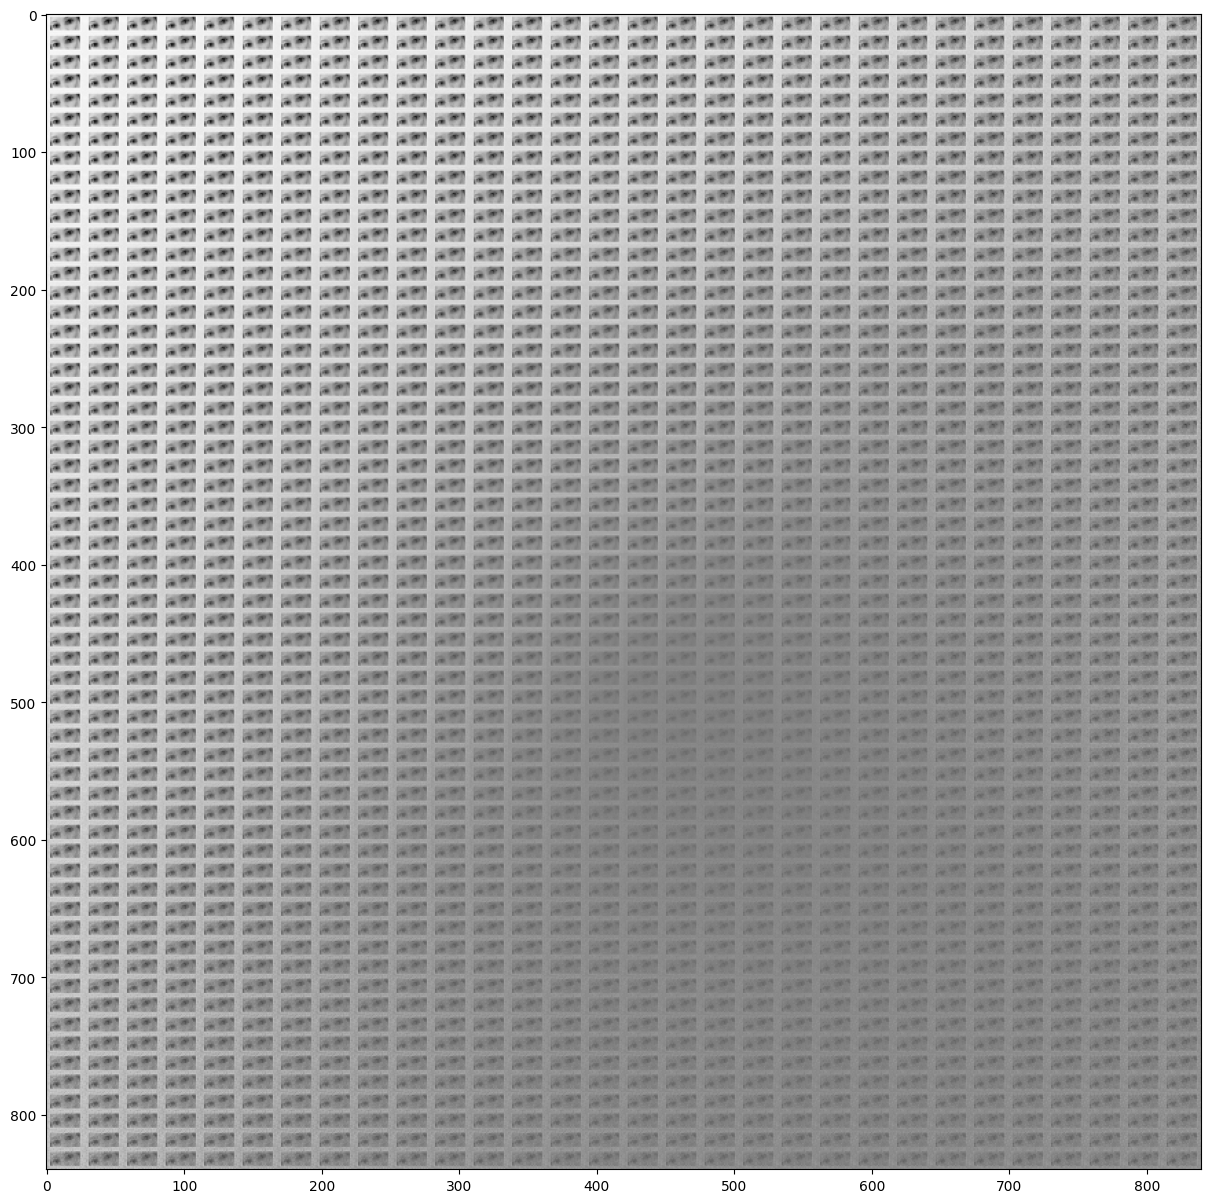

In [10]:
def plot_latent_space(decoder, n=30, figsize=15):
    scale = 1.0
    figure = np.zeros((28 * n, 28 * n))
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(28, 28)
            figure[i * 28: (i + 1) * 28, j * 28: (j + 1) * 28] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.imshow(figure, cmap='Greys_r')
    plt.show()

plot_latent_space(decoder)
